In [2]:
import os
import pandas as pd
from dirs import ROOT_DIR
from __future__ import (absolute_import, division, print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline

logs_relative_path = r'weights/cell20180412T2356/logs.csv'

df = pd.read_csv(os.path.join(ROOT_DIR, logs_relative_path))
print(df[:50])

Populating the interactive namespace from numpy and matplotlib
    epoch      loss  mrcnn_bbox_loss  mrcnn_class_loss  mrcnn_mask_loss  \
0       0  1.366851         0.258185          0.329487         0.261457   
1       1  1.095481         0.187670          0.288324         0.246486   
2       2  1.040028         0.178515          0.281066         0.246287   
3       3  1.006972         0.169872          0.273158         0.241158   
4       4  0.967350         0.164462          0.264405         0.237043   
5       5  0.958180         0.161870          0.262785         0.233249   
6       6  0.944655         0.158953          0.265187         0.234954   
7       7  0.929426         0.156314          0.260637         0.231737   
8       8  0.917391         0.155221          0.257133         0.231771   
9       9  0.917546         0.155767          0.256816         0.231188   
10     10  0.907194         0.152039          0.255662         0.229605   
11     11  0.899695         0.152077 

In [9]:
df['loss'] = df['loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['mrcnn_bbox_loss'] = df['mrcnn_bbox_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['mrcnn_mask_loss'] = df['mrcnn_mask_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['val_loss'] = df['val_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['val_mrcnn_bbox_loss'] = df['val_mrcnn_bbox_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)
df['val_mrcnn_mask_loss'] = df['val_mrcnn_mask_loss'].map(lambda x: x.lstrip('"[[').rstrip(']]"')).astype(float)


AttributeError: 'float' object has no attribute 'lstrip'

In [3]:
mask_loss_df = df[[x for x in df.columns if 'mrcnn_mask_loss' in x] + ['epoch']]
print(mask_loss_df[40:60])

    mrcnn_mask_loss  val_mrcnn_mask_loss  epoch
40         0.216989             0.193716     40
41         0.214418             0.202536     41
42         0.212682             0.245518     42
43         0.214714             0.239424     43
44         0.212865             0.196377     44
45         0.212890             0.188480     45
46         0.212445             0.219817     46
47         0.214138             0.197568     47
48         0.211797             0.216585     48
49         0.208451             0.246164     49
50         0.208804             0.235040     50
51         0.209517             0.187763     51
52         0.211228             0.221685     52
53         0.211203             0.240693     53
54         0.209367             0.171244     54
55         0.210103             0.252691     55
56         0.207341             0.210534     56
57         0.208026             0.207259     57
58         0.207087             0.251691     58
59         0.208715             0.198282

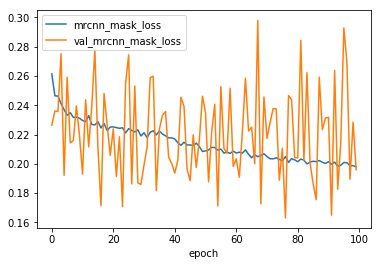

In [4]:
mask_loss_df.groupby('epoch').sum().plot()